In [1]:
#import packages
#import sys
#!{sys.executable} -m pip install matplotlib plotly seaborn

import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import seaborn as sns

In [5]:
# reading all train data files
#working_direc = os.getcwd()
#print(working_direc)
#path = working_direc + "\\rsna_data\\train_images\\train.csv"
#print(os.path.exists('D:/Kaggle/RSNA_IMAGE_PREDICTION/rsna_data/train.csv'))

train_data_df = pd.read_csv('D:/Kaggle/RSNA_IMAGE_PREDICTION/rsna_data/train.csv')
train_label_df = pd.read_csv('D:/Kaggle/RSNA_IMAGE_PREDICTION/rsna_data/train_label_coordinates.csv')
train_desc_df = pd.read_csv('D:/Kaggle/RSNA_IMAGE_PREDICTION/rsna_data/train_series_descriptions.csv')

In [9]:
#severity levels of various lumber spine conditions
train_data_df.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [8]:
train_data_df.shape #1974 samples, each got evaluated on 25 conditions

(1975, 26)

In [10]:
#see column names: 25 conditions
for i, column in enumerate(train_data_df.columns, start=0):
    if i==0: #skipping study_id column, here we want to show only Lumbar Spine conditions 
        continue
    print(f"{i}. {column}") #f-string with embedded variables
    if i%5==0:
        print('-----------------------')

1. spinal_canal_stenosis_l1_l2
2. spinal_canal_stenosis_l2_l3
3. spinal_canal_stenosis_l3_l4
4. spinal_canal_stenosis_l4_l5
5. spinal_canal_stenosis_l5_s1
-----------------------
6. left_neural_foraminal_narrowing_l1_l2
7. left_neural_foraminal_narrowing_l2_l3
8. left_neural_foraminal_narrowing_l3_l4
9. left_neural_foraminal_narrowing_l4_l5
10. left_neural_foraminal_narrowing_l5_s1
-----------------------
11. right_neural_foraminal_narrowing_l1_l2
12. right_neural_foraminal_narrowing_l2_l3
13. right_neural_foraminal_narrowing_l3_l4
14. right_neural_foraminal_narrowing_l4_l5
15. right_neural_foraminal_narrowing_l5_s1
-----------------------
16. left_subarticular_stenosis_l1_l2
17. left_subarticular_stenosis_l2_l3
18. left_subarticular_stenosis_l3_l4
19. left_subarticular_stenosis_l4_l5
20. left_subarticular_stenosis_l5_s1
-----------------------
21. right_subarticular_stenosis_l1_l2
22. right_subarticular_stenosis_l2_l3
23. right_subarticular_stenosis_l3_l4
24. right_subarticular_stenos

In [11]:
# Get basic info about the dataset
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1974 non-null   object
 2   spinal_canal_stenosis_l2_l3             1974 non-null   object
 3   spinal_canal_stenosis_l3_l4             1974 non-null   object
 4   spinal_canal_stenosis_l4_l5             1974 non-null   object
 5   spinal_canal_stenosis_l5_s1             1974 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1973 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1973 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1973 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1973 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1973 non-null   object
 11  righ

In [12]:
# Check for missing values
train_data_df.isnull().sum()

study_id                                    0
spinal_canal_stenosis_l1_l2                 1
spinal_canal_stenosis_l2_l3                 1
spinal_canal_stenosis_l3_l4                 1
spinal_canal_stenosis_l4_l5                 1
spinal_canal_stenosis_l5_s1                 1
left_neural_foraminal_narrowing_l1_l2       2
left_neural_foraminal_narrowing_l2_l3       2
left_neural_foraminal_narrowing_l3_l4       2
left_neural_foraminal_narrowing_l4_l5       2
left_neural_foraminal_narrowing_l5_s1       2
right_neural_foraminal_narrowing_l1_l2      8
right_neural_foraminal_narrowing_l2_l3      8
right_neural_foraminal_narrowing_l3_l4      8
right_neural_foraminal_narrowing_l4_l5      8
right_neural_foraminal_narrowing_l5_s1      8
left_subarticular_stenosis_l1_l2          164
left_subarticular_stenosis_l2_l3           82
left_subarticular_stenosis_l3_l4            3
left_subarticular_stenosis_l4_l5            3
left_subarticular_stenosis_l5_s1           11
right_subarticular_stenosis_l1_l2 

In [17]:
#import sys
#!{sys.executable} -m pip install prettytable
from prettytable import PrettyTable

# Initialize a PrettyTable
table = PrettyTable()

# Combine all severity columns into a single dataframe for better visualization
severity_counts = pd.DataFrame()
cols = train_data_df.columns[1:] # Exclude the first column (assuming it is an ID column)
for column in cols:
    counts = train_data_df[column].value_counts().reset_index() #count the occurrences of unique values, then reset index
    counts.columns = ['Severity', 'Count']
    counts['Type'] = column
    severity_counts = pd.concat([severity_counts, counts]) #Concatenate DataFrames along rows (axis=0)

severity_counts.head()

#add column name to pretty table
table.field_names = ["Severity", "Count", "Type"]

# Add rows to the table
for row in severity_counts.itertuples(index=False):
    table.add_row([row.Severity, row.Count, row.Type])

# Print the table
print(table)

+-------------+-------+----------------------------------------+
|   Severity  | Count |                  Type                  |
+-------------+-------+----------------------------------------+
| Normal/Mild |  1886 |      spinal_canal_stenosis_l1_l2       |
|   Moderate  |   67  |      spinal_canal_stenosis_l1_l2       |
|    Severe   |   21  |      spinal_canal_stenosis_l1_l2       |
| Normal/Mild |  1770 |      spinal_canal_stenosis_l2_l3       |
|   Moderate  |  151  |      spinal_canal_stenosis_l2_l3       |
|    Severe   |   53  |      spinal_canal_stenosis_l2_l3       |
| Normal/Mild |  1622 |      spinal_canal_stenosis_l3_l4       |
|   Moderate  |  230  |      spinal_canal_stenosis_l3_l4       |
|    Severe   |  122  |      spinal_canal_stenosis_l3_l4       |
| Normal/Mild |  1482 |      spinal_canal_stenosis_l4_l5       |
|    Severe   |  255  |      spinal_canal_stenosis_l4_l5       |
|   Moderate  |  237  |      spinal_canal_stenosis_l4_l5       |
| Normal/Mild |  1904 |  

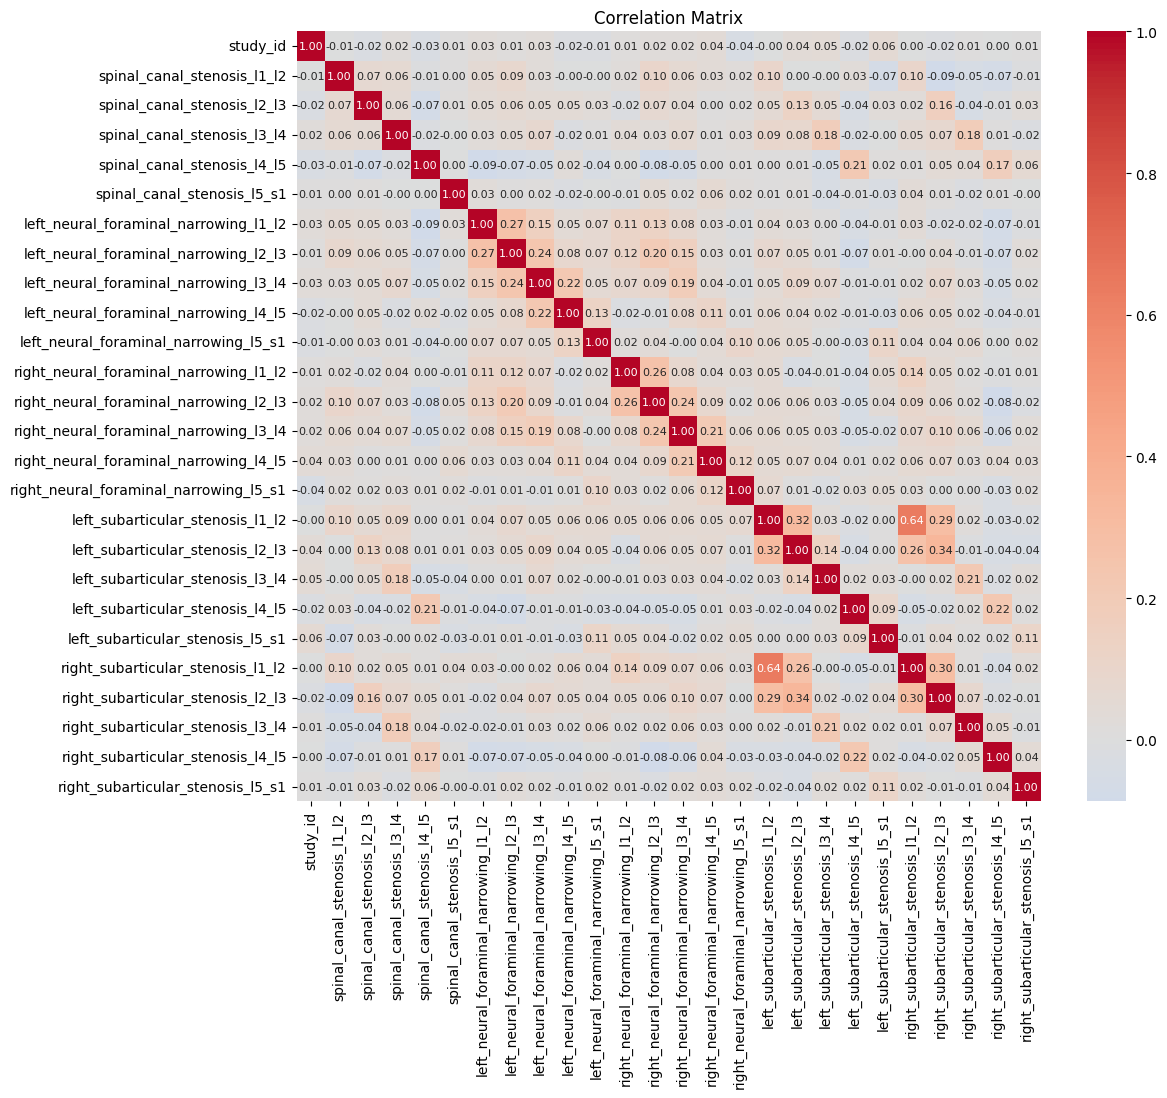

In [23]:
# Encoding the categorical variables to numerical values for correlation analysis
df_temp = train_data_df.copy()
for column in cols:
    df_temp[column] = df_temp[column].astype('category').cat.codes #generates the corresponding integer codes for each unique category 

# Compute the correlation matrix
correlation_matrix = df_temp.corr(method='spearman')

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
           annot_kws={"size": 8}, center=0) #fmt='.2f' formats the annotations to two decimal places.
plt.title('Correlation Matrix')
plt.show()

In [25]:
#lambda arguments: expression
# Pairplot for selected columns
#selected_columns = train_data_df.columns[1:10]  # Select a subset for a clearer visualization
#sns.pairplot(train_data_df[selected_columns].astype('category').apply(lambda x: x.cat.codes)) #By default, apply() applies a function to each column
#plt.show()

In [26]:
train_label_df.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [27]:
train_label_df.shape

(48692, 7)

In [28]:
print('Summary statistics ------------\n')
print()
print(train_label_df.describe())


print('\nDataset information ------------\n')
print()
print(train_label_df.info())

print('\nDisplaying for missing values ------------\n')
print()
print(train_label_df.isnull().sum())

Summary statistics ------------


           study_id     series_id  instance_number             x             y
count  4.869200e+04  4.869200e+04     48692.000000  48692.000000  48692.000000
mean   2.160244e+09  2.154461e+09        13.409677    238.237527    233.070212
std    1.237310e+09  1.244319e+09        56.585031     73.226429     92.480334
min    4.003253e+06  1.099600e+04         1.000000      4.058824      2.063098
25%    1.093392e+09  1.069855e+09         7.000000    179.068100    164.740474
50%    2.196441e+09  2.163803e+09        11.000000    234.836173    219.125160
75%    3.225352e+09  3.242314e+09        15.000000    282.732743    289.759563
max    4.290709e+09  4.294540e+09      5046.000000    686.190305    801.859719

Dataset information ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48692 entries, 0 to 48691
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   study_id      

In [29]:
# Unique values and counts
print(train_label_df['study_id'].nunique())
print(train_label_df['series_id'].nunique())
print(train_label_df['instance_number'].nunique())

1974
6291
101


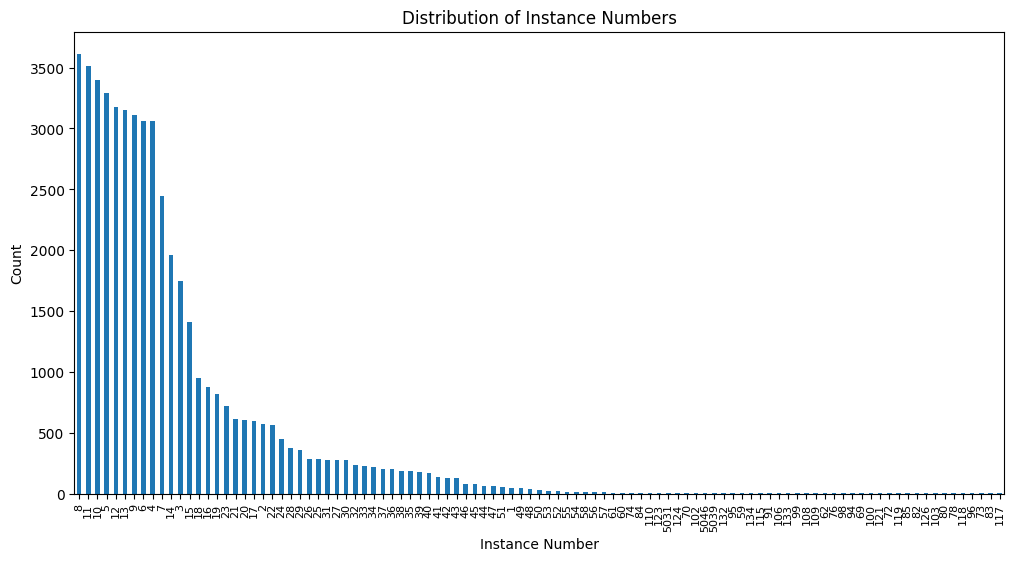

In [41]:
plt.figure(figsize=(12, 6))
#train_label_df['instance_number'] = pd.to_numeric(train_label_df['instance_number'], errors='coerce')
train_label_df['instance_number'].value_counts().plot(kind='bar')
plt.title('Distribution of Instance Numbers')
plt.xlabel('Instance Number')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.show()

level                             L1/L2  L2/L3  L3/L4  L4/L5  L5/S1
condition                                                          
Left Neural Foraminal Narrowing    1972   1972   1972   1972   1972
Left Subarticular Stenosis         1810   1892   1971   1971   1964
Right Neural Foraminal Narrowing   1972   1972   1971   1972   1972
Right Subarticular Stenosis        1812   1891   1971   1971   1967
Spinal Canal Stenosis              1904   1934   1973   1972   1970


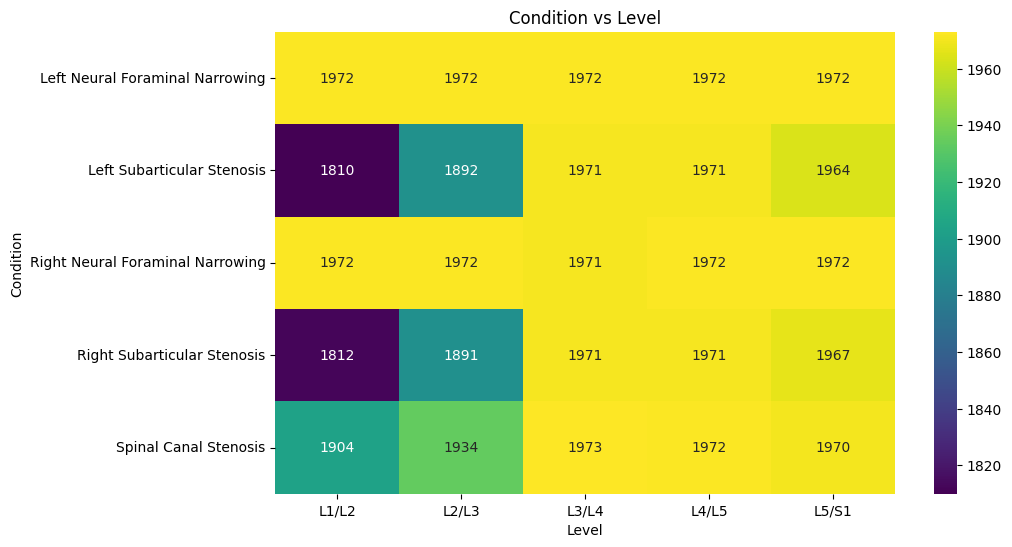

In [42]:
# Cross-tabulation of condition and level
condition_level_ct = pd.crosstab(train_label_df['condition'], train_label_df['level'])
print(condition_level_ct)

plt.figure(figsize=(10, 6))
sns.heatmap(condition_level_ct, annot=True, fmt='d', cmap='viridis') #display as integers ('d' format) 
plt.title('Condition vs Level')
plt.xlabel('Level')
plt.ylabel('Condition')
plt.show()

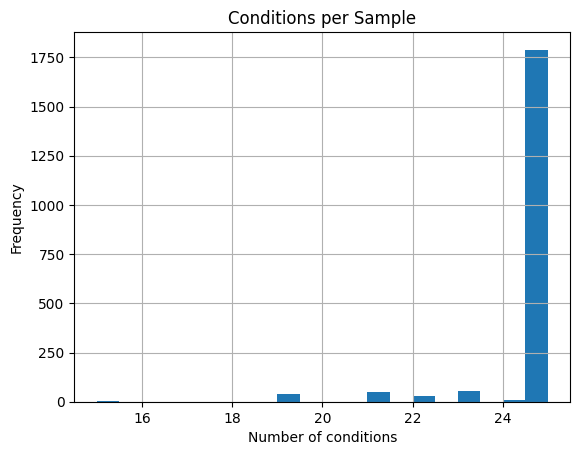

In [46]:
#how many conditions each sample has
study_condition_counts = train_label_df.groupby('study_id').size()
study_condition_counts.head()

study_condition_counts.hist(bins=20)
plt.title('Conditions per Sample')
plt.xlabel('Number of conditions')
plt.ylabel('Frequency')
plt.show()

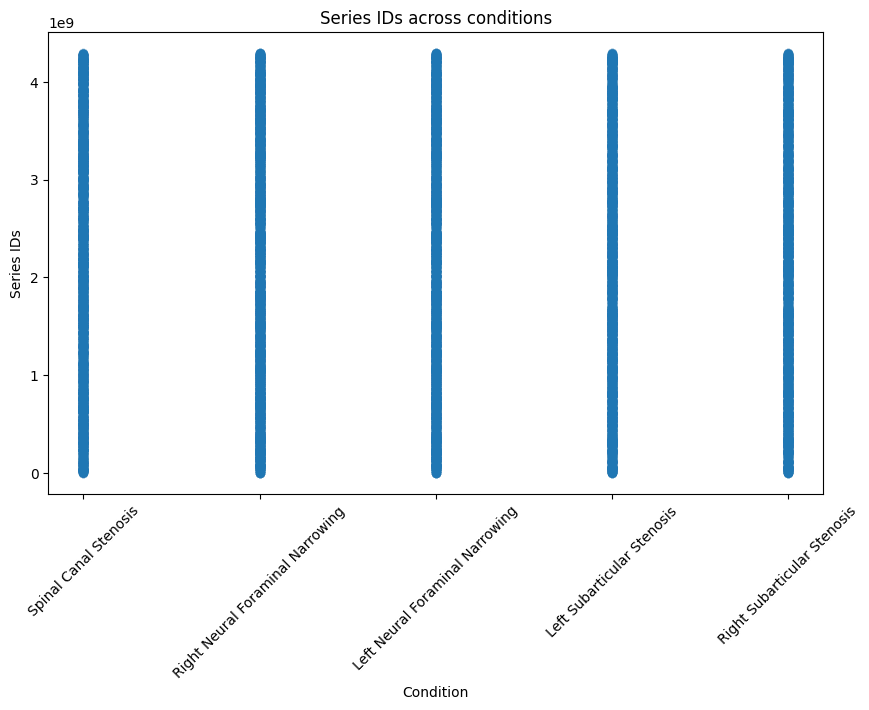

In [60]:
#to see if series ids are uniformly distributed across conditions
plt.figure(figsize=(10, 6))
plt.scatter(train_label_df['condition'], train_label_df['series_id'], alpha=0.1)
plt.title('Series IDs across conditions')
plt.xlabel('Condition')
plt.ylabel('Series IDs')
plt.xticks(rotation=45)
plt.show()


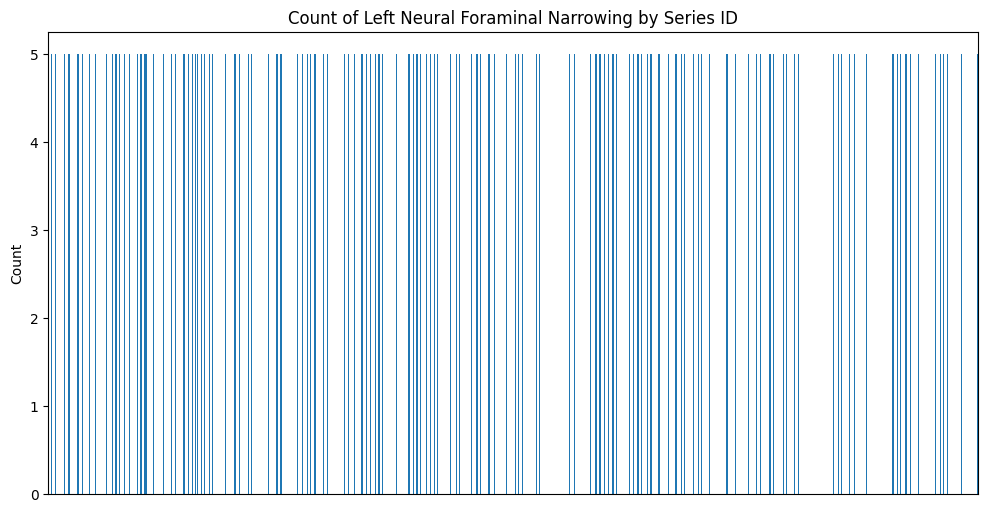

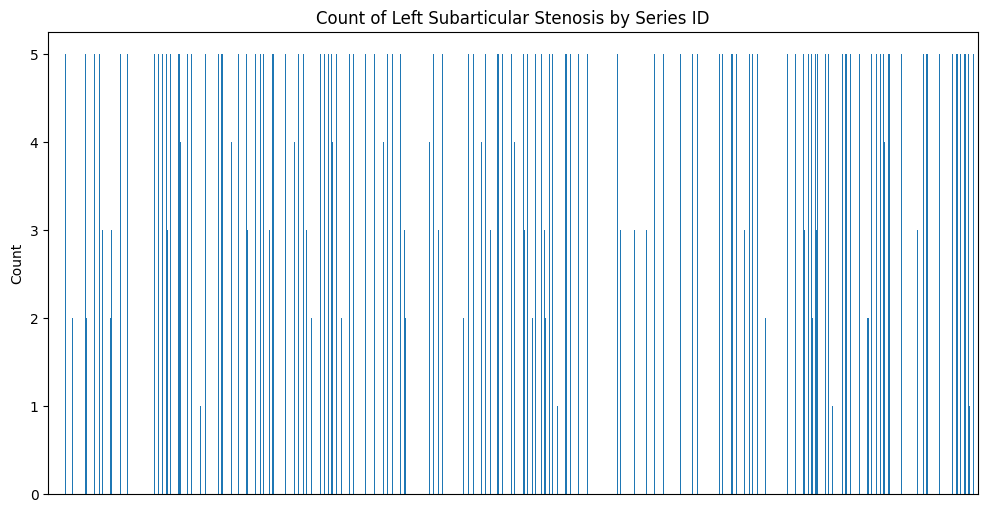

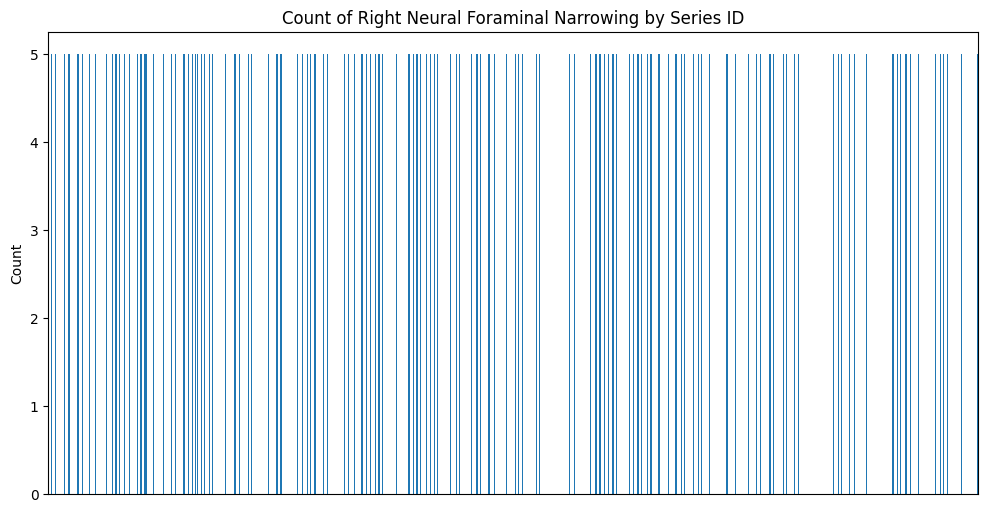

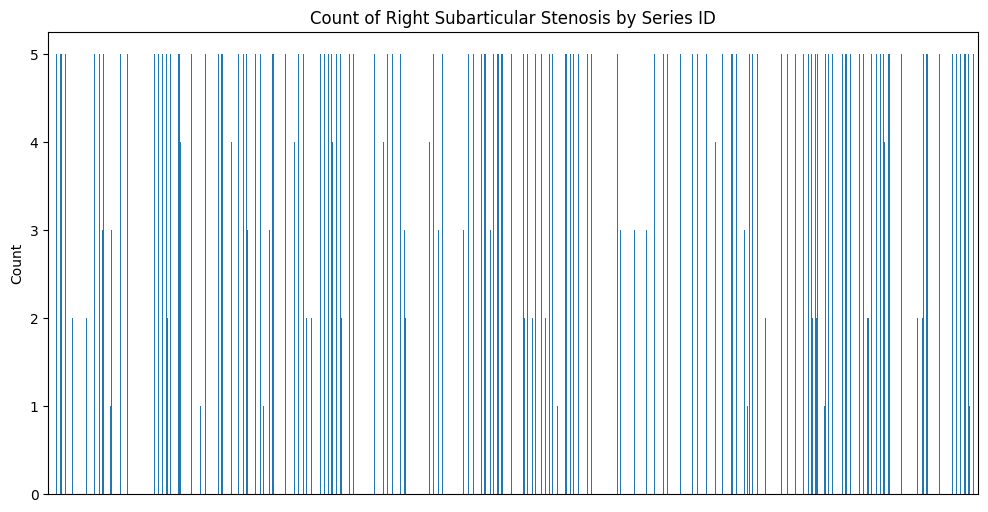

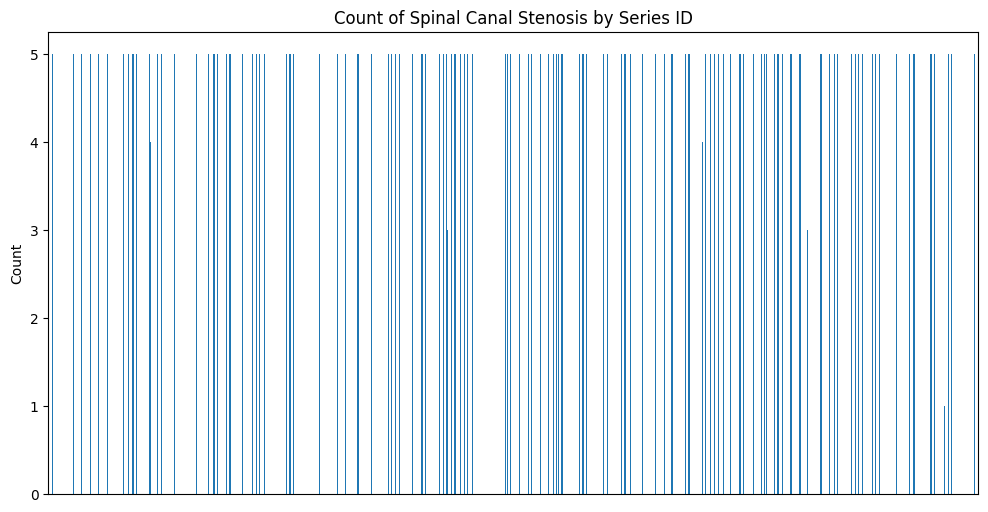

In [65]:
#to see if series ids are uniformly distributed across conditions
series_condition_counts = train_label_df.groupby('series_id')['condition'].value_counts().unstack()
# Plot each condition separately
conditions = series_condition_counts.columns

for condition in conditions:
    plt.figure(figsize=(12, 6))
    series_condition_counts[condition].plot(kind='bar')
    plt.title(f'Count of {condition} by Series ID')
    plt.xlabel('Series ID')
    plt.ylabel('Count')
    # Remove x-axis labels
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.show()

In [67]:
#Creating merged dataframe as fina_train_df
# Step 1: Creating the new column by concatenating values from'conditions and 'level'
train_label_df['new_col'] = train_label_df['condition'].str.lower().str.replace(' ', '_') +  '_' + train_label_df['level'].str.lower().str.replace('/', '_')

# Step 2: Merge the values from train_data_df based on study_id and the newly created column names
def get_target_value(row):
    study_id = row['study_id']
    new_col = row['new_col']
    return train_data_df[train_data_df['study_id'] == study_id][new_col].values[0] #.values: This converts the pandas object to a NumPy array.

#create a new disease status column in label data matched by study_id and condition
train_label_df['target'] = train_label_df.apply(get_target_value, axis=1) #apply to the row
train_label_df.head()

# Drop the 'new_col' column 
#train_label_df.drop(columns=['new_col'], inplace=True)

# Copy the train_label_df to new DataFrame
final_train_df = train_label_df.copy()


final_train_df.to_csv('final_train.csv')
final_train_df.head()


,study_id,series_id,instance_number,condition,level,x,y,new_col,target
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,spinal_canal_stenosis_l1_l2,Normal/Mild
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,spinal_canal_stenosis_l2_l3,Normal/Mild
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,spinal_canal_stenosis_l3_l4,Normal/Mild
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,spinal_canal_stenosis_l4_l5,Normal/Mild
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,spinal_canal_stenosis_l5_s1,Normal/Mild
